In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Importing data and basic exploration

In [2]:
#read data from input csv file
house_data = pd.read_csv("datasets/kc_house_data.csv")

In [3]:
#Determine the size of the data
print(house_data.shape)

(21613, 21)


In [4]:
#Determine the columns in the data
print(house_data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [5]:
#View information about the data in each columns
print(house_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

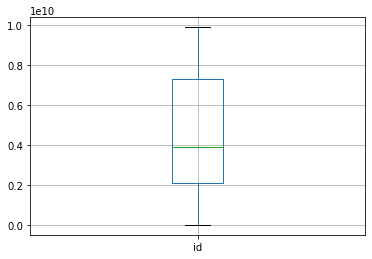

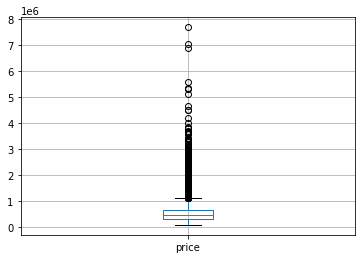

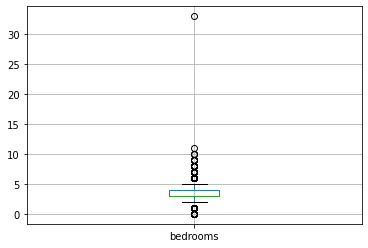

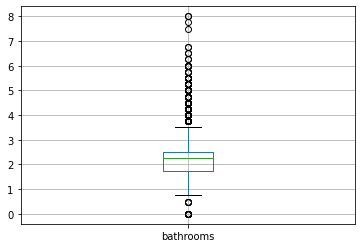

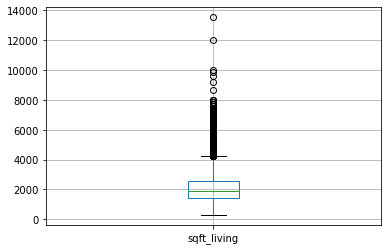

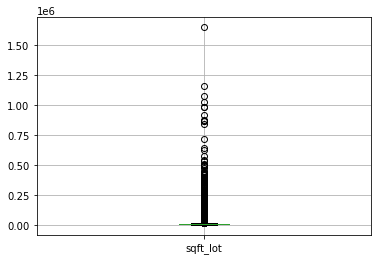

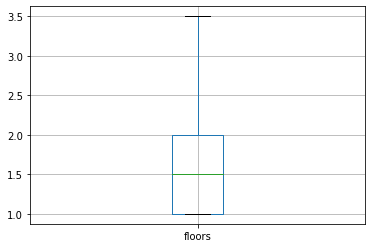

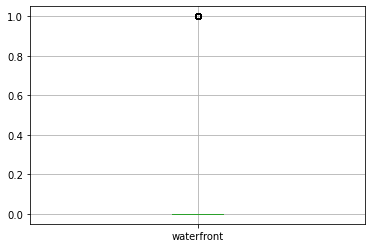

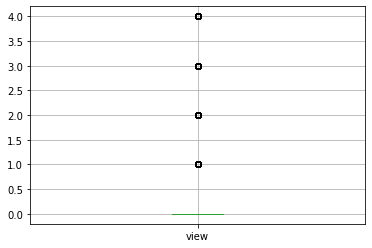

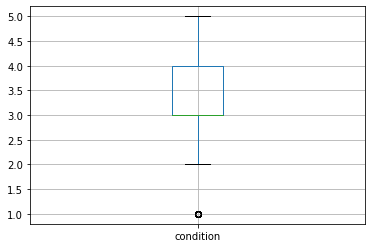

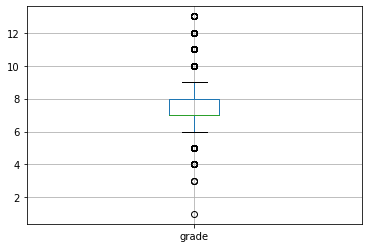

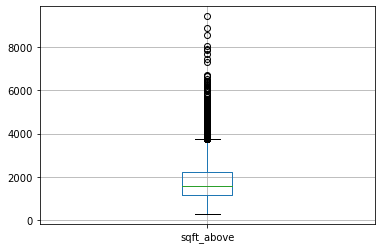

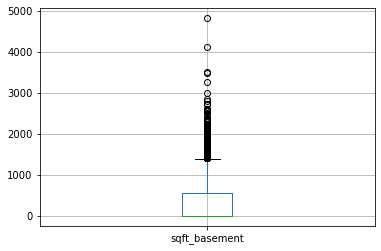

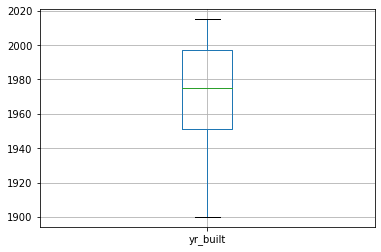

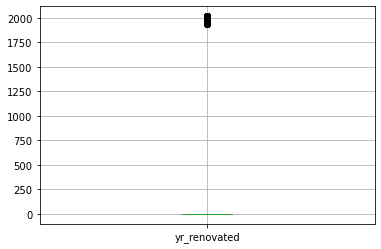

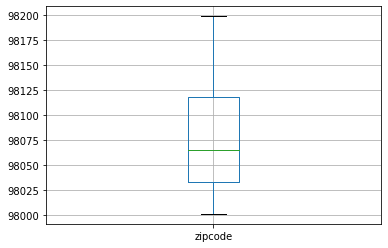

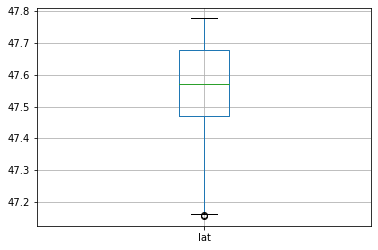

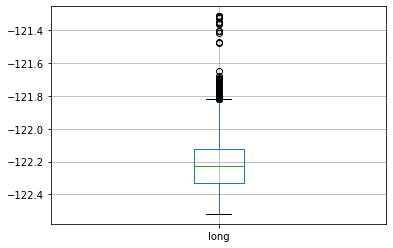

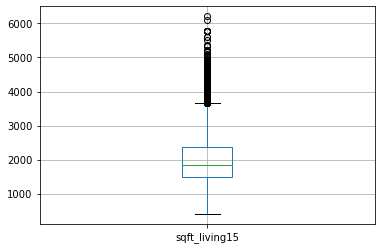

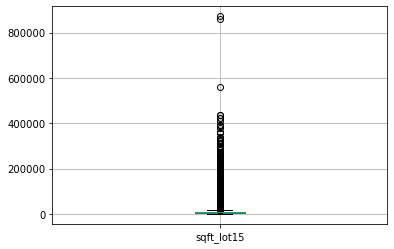

In [6]:
#Check if the data has any missing values (null)
house_data.isna().sum()

# Checkfor outliers using multiple boxplots
for column in house_data:
    if house_data[column].dtype in ['int64','float64']:
        plt.figure()
        house_data.boxplot(column=[column])

# Although there are some outliers, we are not handling them in this exercise. 

#### Choose features to further work on
In our case, let us pick price as the target; and date, bedrooms, bathrooms, sqft_living, floors, waterfront, view, condition, grade, zipcode as features


In [7]:
house_data_df = house_data[["price","date", "bedrooms", 
                                  "bathrooms", "sqft_living", "floors", 
                                  "waterfront", "view", "condition", "grade","zipcode"]]

### Feature Engineering
1. Lets split date into year and month to consider that price could depend on year and month of sale due to market conditions
2. Lets treat waterfront, view, condition, grade, year, month and zipcode as categorical features.
3. Lets treat price, bedrooms, bathrooms, spft_living, floors as continuous numerical values
4. Lets encode the categorical values and normalise the numerical values.

In [8]:
# Extracting year and month from date
house_data_df.loc[:,"year"] = house_data["date"].str[0:4]
house_data_df.loc[:,"month"] = house_data["date"].str[4:6]
house_data_df

,price,date,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,zipcode,year,month
0,221900.0,20141013T000000,3,1.00,1180,1.0,0,0,3,7,98178,2014,10
1,538000.0,20141209T000000,3,2.25,2570,2.0,0,0,3,7,98125,2014,12
2,180000.0,20150225T000000,2,1.00,770,1.0,0,0,3,6,98028,2015,02
3,604000.0,20141209T000000,4,3.00,1960,1.0,0,0,5,7,98136,2014,12
4,510000.0,20150218T000000,3,2.00,1680,1.0,0,0,3,8,98074,2015,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,20140521T000000,3,2.50,1530,3.0,0,0,3,8,98103,2014,05
21609,400000.0,20150223T000000,4,2.50,2310,2.0,0,0,3,8,98146,2015,02
21610,402101.0,20140623T000000,2,0.75,1020,2.0,0,0,3,7,98144,2014,06
21611,400000.0,20150116T000000,3,2.50,1600,2.0,0,0,3,8,98027,2015,01


In [9]:
#removing date after this extraction
house_data_df = house_data_df.drop(columns=["date"])

#### Encoding categorical data
* categorical data are encoded to numerical values, so that the 
    + libraries can process the data efficiently.
    + each class of a categorical column is weighted equally.

In [10]:
# encoding categorical values
cat_features = ["waterfront", "view", "condition", "grade", "year", "month", "zipcode"]
house_data_df = pd.get_dummies(house_data_df,columns=cat_features)
print(house_data_df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront_0', 'waterfront_1', 'view_0', 'view_1', 'view_2',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=113)


#### Normalizing Continuous Numerical data
* The features that have continuous numerical values are normalized so that, each of these features span across a common range of values, and hence would have equal influence on the model build.

In [11]:
from sklearn.preprocessing import StandardScaler
# finding the mean and std deviation of numerical columns
scaler = StandardScaler().fit(house_data_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors']]) 
# scaling columns to a common range
house_data_normalized = scaler.transform(house_data_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors']])# Scaled data 

In [12]:
house_data_normalized

array([[-0.86671733, -0.39873715, -1.44746357, -0.97983502, -0.915427  ],
       [-0.00568792, -0.39873715,  0.1756067 ,  0.53363434,  0.93650577],
       [-0.98084935, -1.47395936, -1.44746357, -1.42625404, -0.915427  ],
       ...,
       [-0.37586519, -1.47395936, -1.77207762, -1.15404732,  0.93650577],
       [-0.38158814, -0.39873715,  0.50022075, -0.52252773,  0.93650577],
       [-0.58588173, -1.47395936, -1.77207762, -1.15404732,  0.93650577]])

In [13]:
# updating the numerical(normalized) data into the data frame
house_data_df_normalized=pd.DataFrame(house_data_normalized,columns=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors'])
house_data_df_normalized=house_data_df_normalized.join(house_data_df[house_data_df.columns.drop(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors'])])

In [14]:
house_data_df_normalized

,price,bedrooms,bathrooms,sqft_living,floors,waterfront_0,waterfront_1,view_0,view_1,view_2,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,-0.866717,-0.398737,-1.447464,-0.979835,-0.915427,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-0.005688,-0.398737,0.175607,0.533634,0.936506,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.980849,-1.473959,-1.447464,-1.426254,-0.915427,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.174090,0.676485,1.149449,-0.130550,-0.915427,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.081958,-0.398737,-0.149007,-0.435422,-0.915427,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.490545,-0.398737,0.500221,-0.598746,2.788439,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21609,-0.381588,0.676485,0.500221,0.250539,0.936506,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
21610,-0.375865,-1.473959,-1.772078,-1.154047,0.936506,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21611,-0.381588,-0.398737,0.500221,-0.522528,0.936506,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
Y = house_data_df_normalized['price']

X = house_data_df_normalized[house_data_df_normalized.columns.drop('price')]
print(X.shape)

(21613, 112)


#### Splitting the data into train and test

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [18]:
X_train.shape , X_test.shape

((17290, 112), (4323, 112))

#### Building a model on the train data and checking how well the model fits

In [19]:
#importing required module to build the model
from sklearn.linear_model import LinearRegression

In [20]:
#building the model
model = LinearRegression()
model.fit(X_train,Y_train)
train_score=model.score(X_train,Y_train)
test_score=model.score(X_test,Y_test)
print('Train Score (R-Squared): ',train_score)
print('Test Score (R-Squared)',test_score)

Train Score (R-Squared):  0.8336987270194174
Test Score (R-Squared) 0.8313082620280754


#### Evaluate the model's performance on test data

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
#root mean square error (RMSE) calculation for train data
train_predictions = model.predict(X_train)
train_RMSE=mean_squared_error(Y_train,train_predictions)**0.5
print('Train RMSE : ',train_RMSE)

Train RMSE :  0.4078007927303328


In [23]:

test_predictions = model.predict(X_test)

In [24]:
test_RMSE=mean_squared_error(Y_test,test_predictions)**0.5
print('Test RMSE : ',test_RMSE)

Test RMSE :  0.4107102720475509
